In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv(r"C:\Users\Ale\OneDrive\occupationIndustryMilitary.csv")
data

,Obs,cohort,label_cohort,cohort_years,dod_occ_code_level,dod_occ_code,label_dod_occ_code,ind_level,industry,label_industry,...,y10_p50_earnings,y1_p75_earnings,y5_p75_earnings,y10_p75_earnings,status_y1_emp,status_y5_emp,status_y10_emp,status_y1_earn,status_y5_earn,status_y10_earn
0,1,0,2000-2015,16,A,0,All occupations,A,0,All NAICS sectors,...,52620,51030,65130,75520,1,1,1,1,1,1
1,2,0,2000-2015,16,A,0,All occupations,N,11,"Agriculture, Forestry, Fishing and Hunting",...,36290,36580,46210,47560,1,1,1,1,1,1
2,3,0,2000-2015,16,A,0,All occupations,N,21,"Mining, Quarrying, and Oil and Gas Extraction",...,81010,71520,93120,109000,1,1,1,1,1,1
3,4,0,2000-2015,16,A,0,All occupations,N,22,Utilities,...,74440,58190,83140,97510,1,1,1,1,1,1
4,5,0,2000-2015,16,A,0,All occupations,N,23,Construction,...,48430,43170,57060,68970,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,656,2008,2008-2015,8,2,18X,Service and Supply Handlers,N,71,"Arts, Entertainment, and Recreation",...,.,32800,46060,.,1,1,-1,1,1,-1
656,657,2008,2008-2015,8,2,18X,Service and Supply Handlers,N,72,Accommodation and Food Services,...,.,30720,35540,.,1,1,-1,1,1,-1
657,658,2008,2008-2015,8,2,18X,Service and Supply Handlers,N,81,Other Services (except Public Administration),...,.,40140,45550,.,1,1,-1,1,1,-1
658,659,2008,2008-2015,8,2,18X,Service and Supply Handlers,N,92,Public Administration,...,.,42180,55160,.,1,1,-1,1,1,-1


**Determine quality of the data and perform data cleaning where necessary:**

In [2]:
print(data.duplicated().sum) # Determine if there are any duplicated rows that need to be taken care of.

<bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
655    False
656    False
657    False
658    False
659    False
Length: 660, dtype: bool>


In [3]:
print(data.dtypes) # Determine if the data types registered are optimal for data analysis.

Obs                    int64
cohort                 int64
label_cohort          object
cohort_years           int64
dod_occ_code_level    object
dod_occ_code          object
label_dod_occ_code    object
ind_level             object
industry              object
label_industry        object
y1_emp                object
y5_emp                object
y10_emp               object
y1_p25_earnings       object
y5_p25_earnings       object
y10_p25_earnings      object
y1_p50_earnings       object
y5_p50_earnings       object
y10_p50_earnings      object
y1_p75_earnings       object
y5_p75_earnings       object
y10_p75_earnings      object
status_y1_emp          int64
status_y5_emp          int64
status_y10_emp         int64
status_y1_earn         int64
status_y5_earn         int64
status_y10_earn        int64
dtype: object


In [4]:
for column in data.columns:
    if ("earnings" in column or "emp" in column) and not column.startswith("status"):
        data[column] = pd.to_numeric(data[column], errors = "coerce") #changing needed columns from object to int

data["label_dod_occ_code"] = data["label_dod_occ_code"].astype('category')
data["label_industry"] = data["label_industry"].astype('category')


**Overall, the data is clean with high quality, with the exception of certain data types that were not optimal for what the column was storing.
However, the data is good for determining employment trends of veterans based on years of separation in the military.**

In [5]:
data = data.set_index('Obs') 

In [6]:
data.describe()

,cohort,cohort_years,y1_emp,y5_emp,y10_emp,y1_p25_earnings,y5_p25_earnings,y10_p25_earnings,y1_p50_earnings,y5_p50_earnings,y10_p50_earnings,y1_p75_earnings,y5_p75_earnings,y10_p75_earnings,status_y1_emp,status_y5_emp,status_y10_emp,status_y1_earn,status_y5_earn,status_y10_earn
count,660.000000,660.000000,617.000000,598.000000,400.000000,617.000000,598.000000,400.000000,617.000000,598.000000,400.000000,617.00000,598.000000,400.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,1336.000000,10.666667,4046.416532,3513.925585,3097.432500,24993.598055,31481.923077,36608.900000,35491.491086,44503.411371,51881.925000,49866.23987,61846.906355,72489.775000,1.260606,1.375758,0.575758,1.260606,1.375758,0.575758
std,945.416802,3.774096,16883.738150,15004.193043,11963.710372,6446.698618,8557.497197,9926.523559,9746.856988,11840.351035,13282.648094,13872.50934,15517.439197,16951.995667,0.987921,1.167863,1.458174,0.987921,1.167863,1.458174
min,0.000000,8.000000,50.000000,50.000000,52.000000,14100.000000,17220.000000,18410.000000,18350.000000,22710.000000,25070.000000,25590.00000,31140.000000,39400.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,-1.000000
25%,0.000000,8.000000,260.000000,223.000000,227.500000,20890.000000,25320.000000,29707.500000,29710.000000,37137.500000,43460.000000,41950.00000,52760.000000,61655.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,-1.000000
50%,2000.000000,8.000000,772.000000,652.500000,642.500000,23500.000000,30410.000000,35505.000000,33710.000000,43070.000000,50430.000000,46520.00000,59850.000000,70375.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2008.000000,16.000000,2281.000000,2036.500000,1774.500000,27470.000000,35305.000000,41140.000000,40500.000000,49622.500000,57415.000000,57110.00000,68535.000000,80562.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2008.000000,16.000000,312300.000000,262900.000000,155000.000000,59730.000000,62310.000000,64090.000000,81410.000000,87920.000000,91310.000000,110900.00000,115800.000000,122300.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


**The descriptive statistics show that the average number of veterans employed based off their years of separation from year 1, to year 5 to year 10 decreases. The decrease in employment could point towards challenges in employment stability in veterans due to any number of perceived factors such as a general difficult of career transitions, age when leaving military, etc. Their earnings, though, in regard to their percentile of earnings increases on average, showing that the decreased amount of veterans that do stay employed see higher wages. The standard deviation in the columns of employment rates and earnings is very high, which indicates that there is a significant difference in earnings and employment numbers based on military occupation and current civilian industry. This also indicates severe outliers in both fields of employment rates and earnings, which may skew multiple descriptive statistics such as mean and max.**

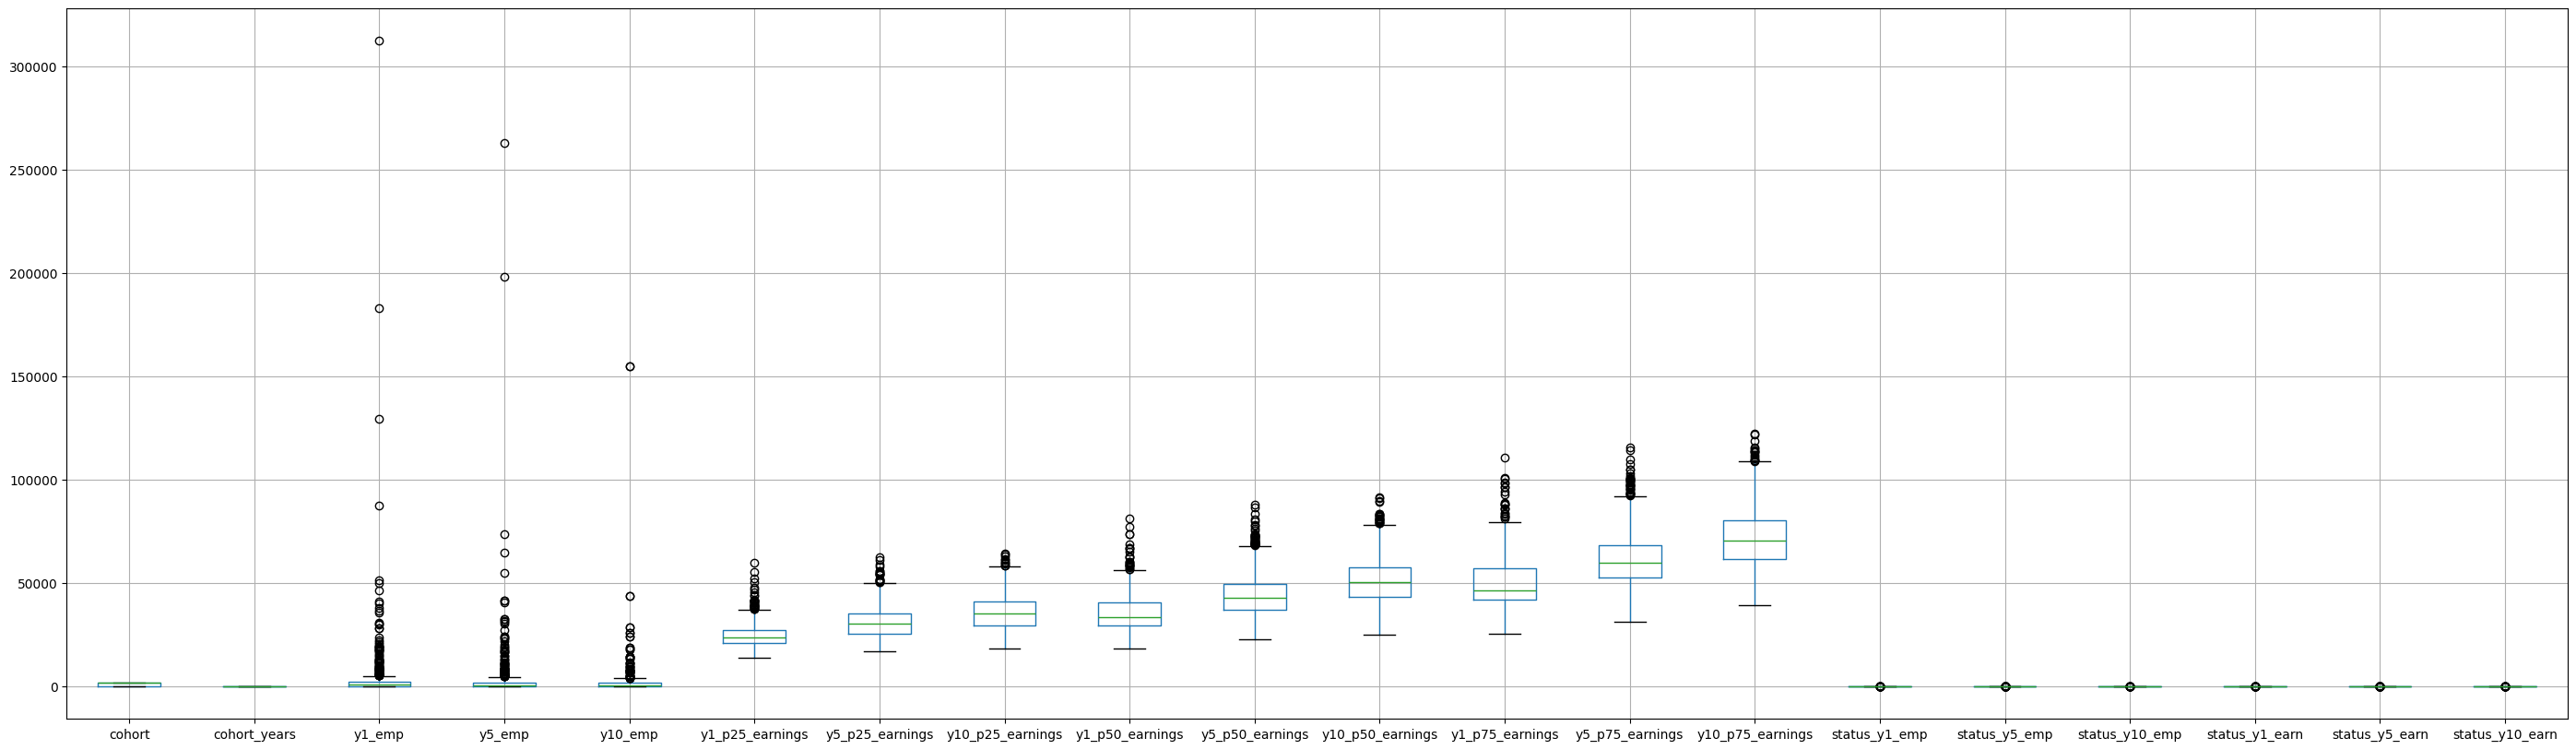

In [7]:
data.boxplot(figsize = (35, 10))
plt.show()

**There are significant outliers in the fields of y1_emp, y5_emp and y10_emp that need to be removed to decrease variability.**

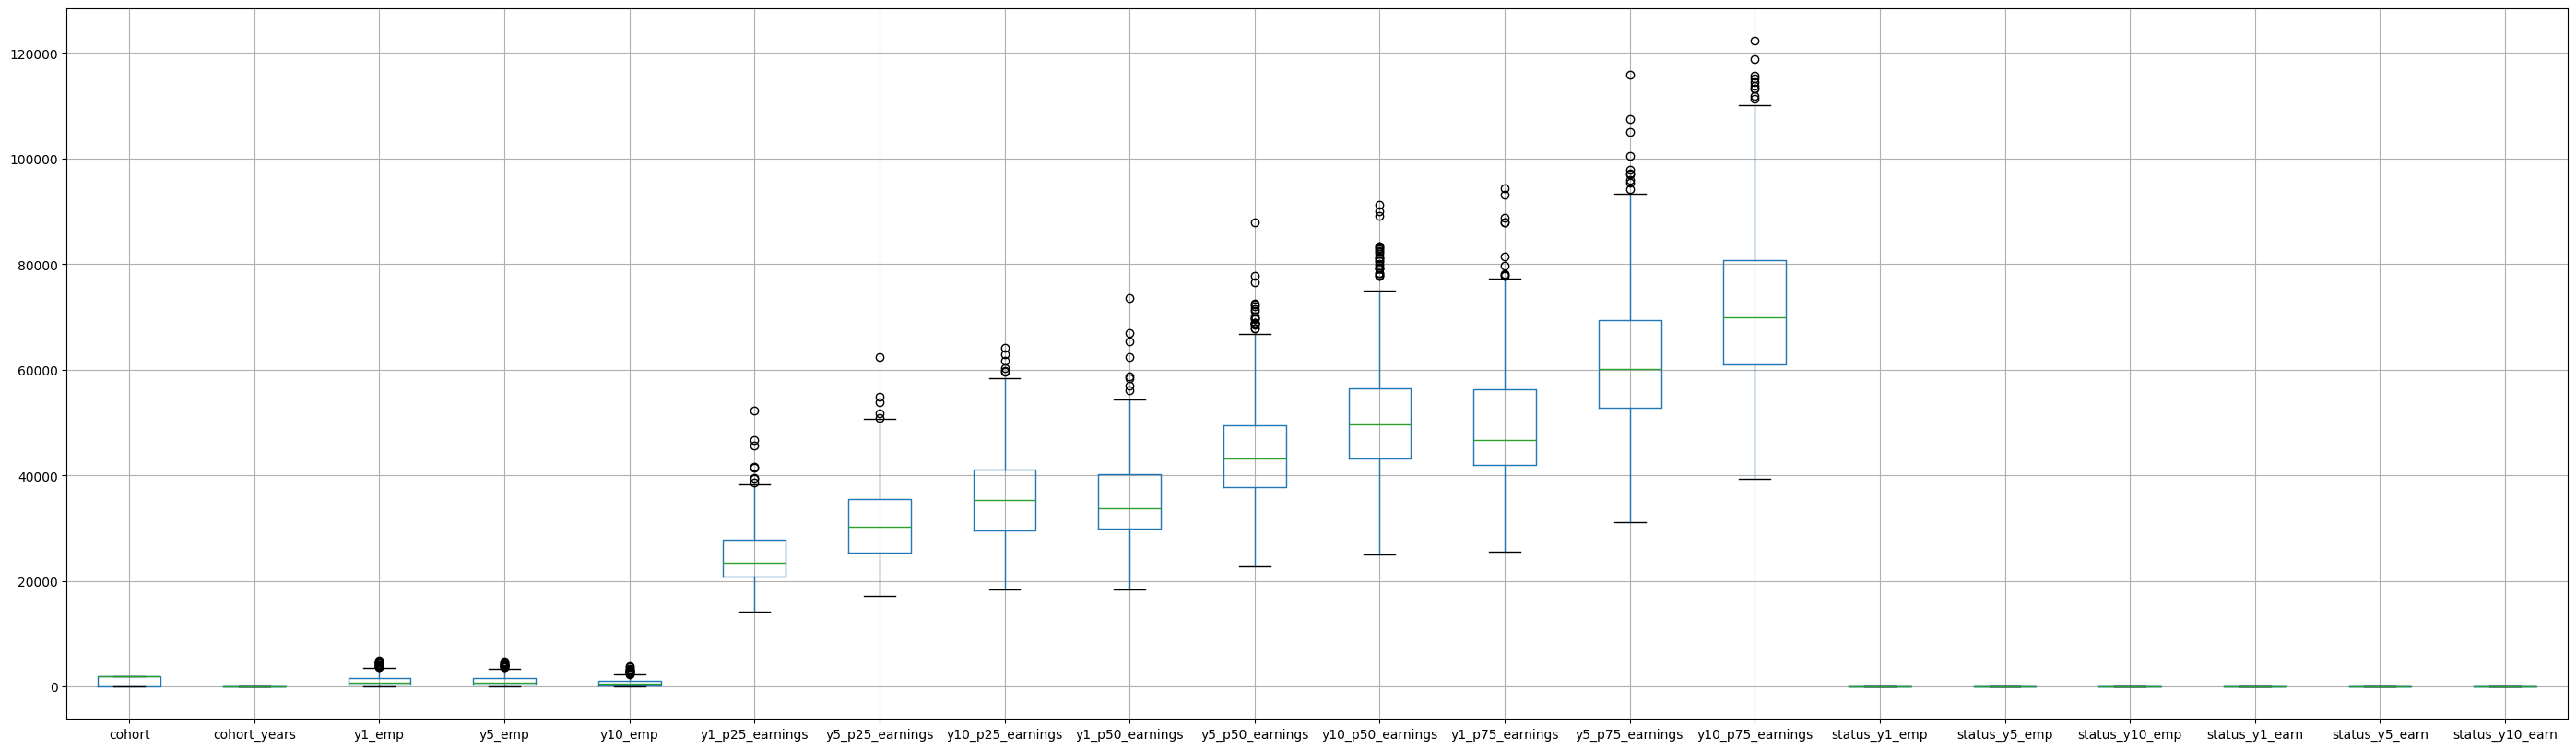

In [8]:
maxY1 = 2281+1.5*(2281-260)
maxY5 = 2036.5+1.5*(2036.5-223)
maxY10 = 1774.5+1.5*(1774.5-227.5)

data = data[data["y1_emp"] <= maxY1]
data = data[data["y5_emp"] <= maxY5]
data = data[data["y10_emp"] <= maxY10]
data.boxplot(figsize = (35, 10))
plt.show()

**Check distribution of each feature:**

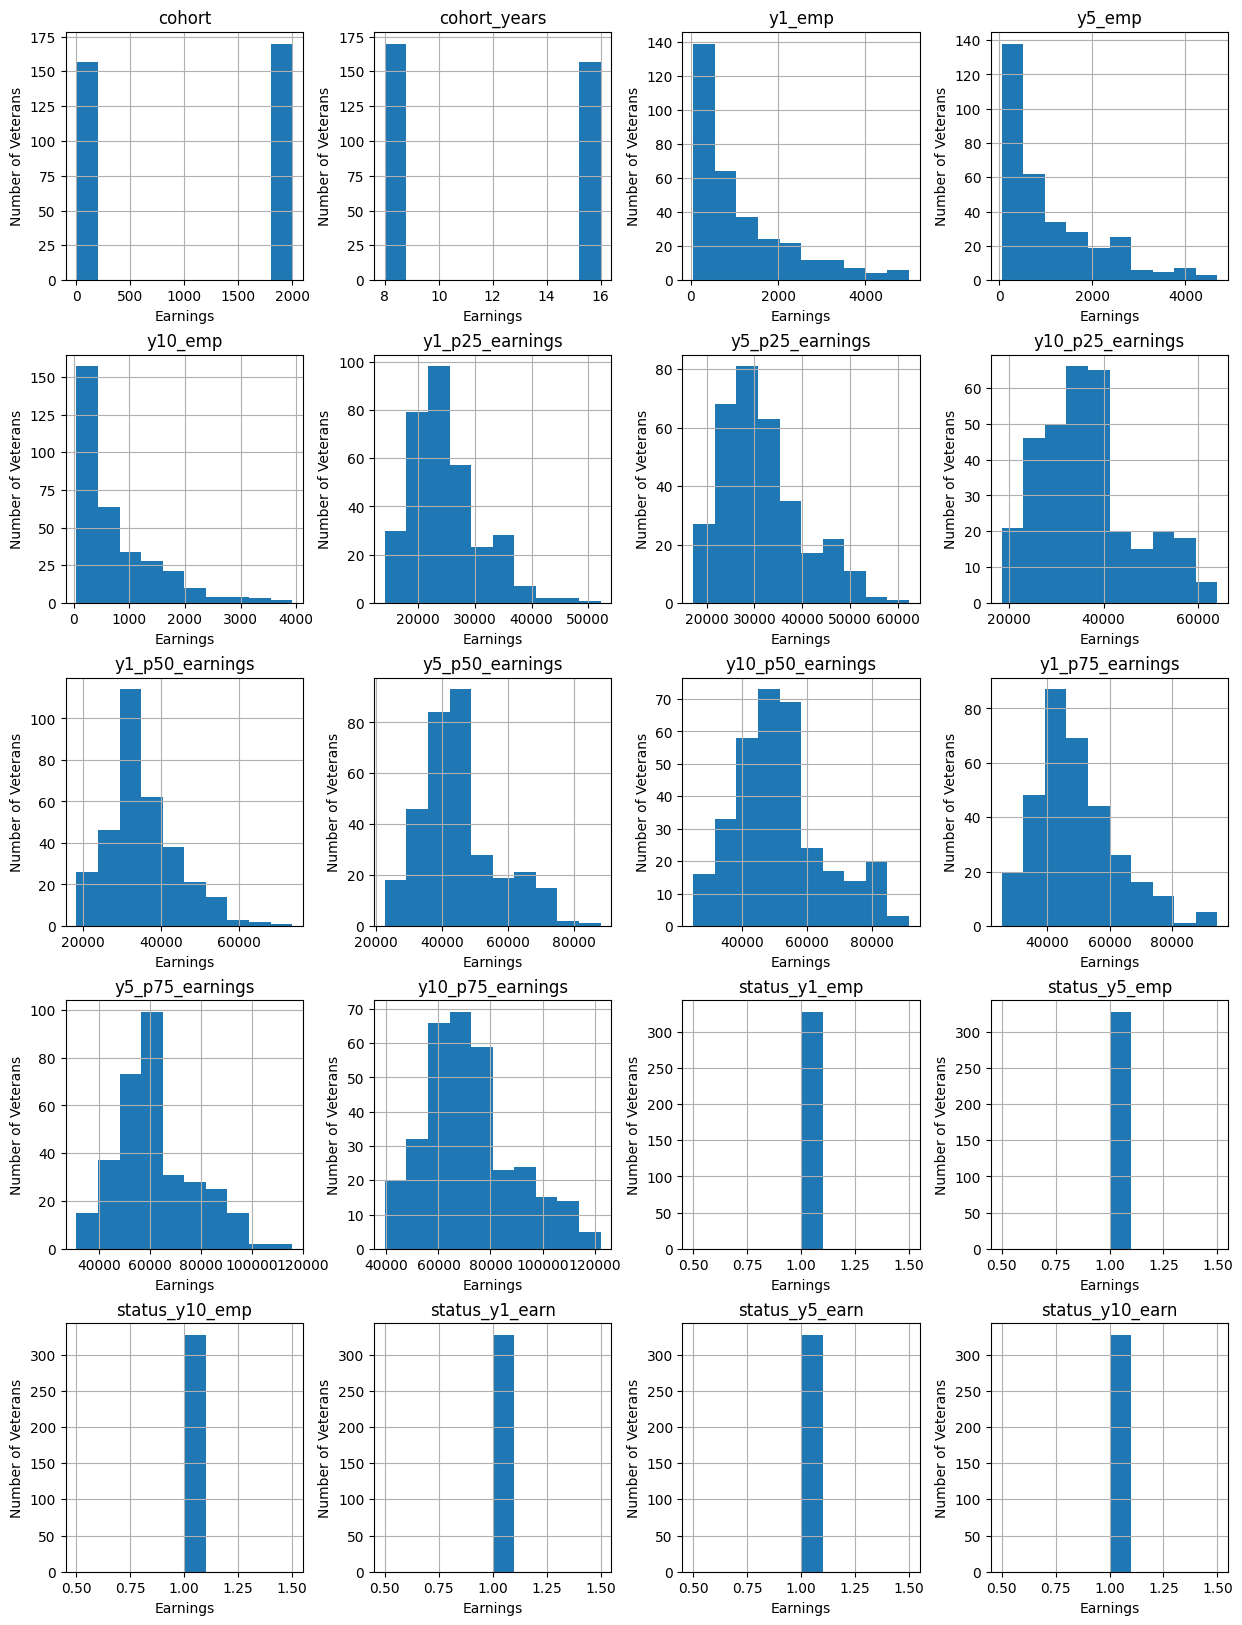

In [9]:
for axes in data.hist(figsize=(15, 20)).flatten(): #.flatten helps to make sure each histogram gets an axes label
    axes.set_xlabel("Earnings")  
    axes.set_ylabel("Number of Veterans") 
plt.show()

**Interpret correlation of features and visualize it with a heatmap:**

In [10]:
corr = data.select_dtypes(include = [float, int]).corr() 
corr

,cohort,cohort_years,y1_emp,y5_emp,y10_emp,y1_p25_earnings,y5_p25_earnings,y10_p25_earnings,y1_p50_earnings,y5_p50_earnings,y10_p50_earnings,y1_p75_earnings,y5_p75_earnings,y10_p75_earnings,status_y1_emp,status_y5_emp,status_y10_emp,status_y1_earn,status_y5_earn,status_y10_earn
cohort,1.000000,-1.000000,-0.129637,-0.015808,0.107142,0.013348,0.015601,0.000080,0.015328,0.022076,0.001301,-0.008177,0.024446,0.004922,NaN,NaN,NaN,NaN,NaN,NaN
cohort_years,-1.000000,1.000000,0.129637,0.015808,-0.107142,-0.013348,-0.015601,-0.000080,-0.015328,-0.022076,-0.001301,0.008177,-0.024446,-0.004922,NaN,NaN,NaN,NaN,NaN,NaN
y1_emp,-0.129637,0.129637,1.000000,0.924990,0.800488,0.074438,0.033593,-0.040672,0.063495,0.020342,-0.028033,0.043076,0.023426,-0.018680,NaN,NaN,NaN,NaN,NaN,NaN
y5_emp,-0.015808,0.015808,0.924990,1.000000,0.955213,0.185809,0.160322,0.083871,0.159453,0.126196,0.079611,0.114430,0.110031,0.073121,NaN,NaN,NaN,NaN,NaN,NaN
y10_emp,0.107142,-0.107142,0.800488,0.955213,1.000000,0.194248,0.188157,0.119468,0.167235,0.149189,0.108756,0.116161,0.126073,0.093154,NaN,NaN,NaN,NaN,NaN,NaN
y1_p25_earnings,0.013348,-0.013348,0.074438,0.185809,0.194248,1.000000,0.951023,0.912310,0.968299,0.953834,0.917882,0.897688,0.915854,0.889661,NaN,NaN,NaN,NaN,NaN,NaN
y5_p25_earnings,0.015601,-0.015601,0.033593,0.160322,0.188157,0.951023,1.000000,0.951469,0.916103,0.970865,0.946926,0.851328,0.927898,0.919508,NaN,NaN,NaN,NaN,NaN,NaN
y10_p25_earnings,0.000080,-0.000080,-0.040672,0.083871,0.119468,0.912310,0.951469,1.000000,0.878193,0.951884,0.978166,0.822951,0.907485,0.945990,NaN,NaN,NaN,NaN,NaN,NaN
y1_p50_earnings,0.015328,-0.015328,0.063495,0.159453,0.167235,0.968299,0.916103,0.878193,1.000000,0.951369,0.905396,0.962559,0.938248,0.883388,NaN,NaN,NaN,NaN,NaN,NaN
y5_p50_earnings,0.022076,-0.022076,0.020342,0.126196,0.149189,0.953834,0.970865,0.951884,0.951369,1.000000,0.968295,0.910210,0.975175,0.952522,NaN,NaN,NaN,NaN,NaN,NaN


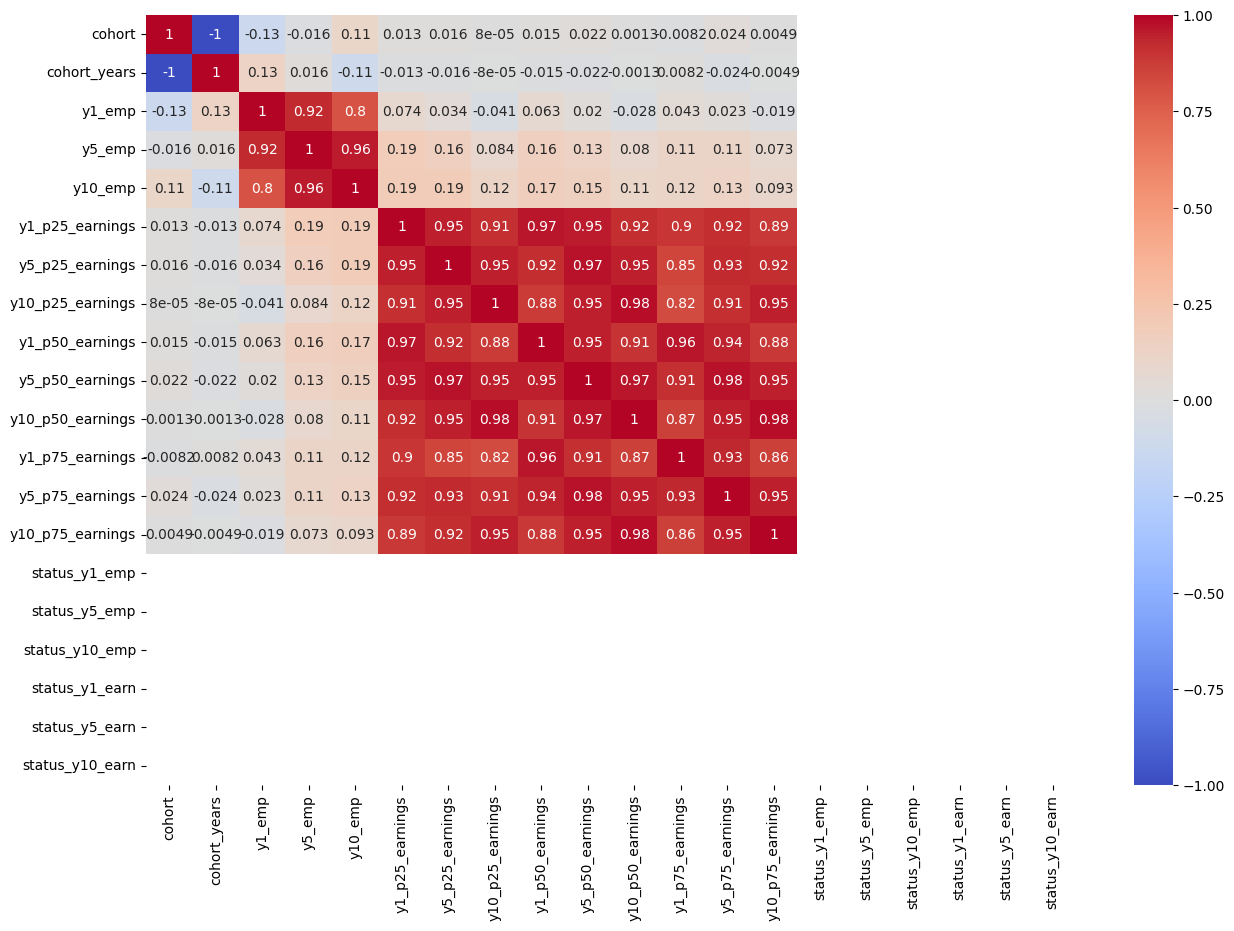

In [11]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot = True, cmap = "coolwarm")
plt.show()

**The independent variables that do not show much correlation is cohort, cohort_years, and all the status variables. These features will be dropped.
The dependent features are y1_emp, y5_emp, y10_emp, y1_p25_earnings, y5_p25_earnings, y10_p25_earnings, y1_p50_earnings, y5_p50_earnings, y10_p50_earnings, y1_p75_earnings, y5_p75_earnings, and y10_p75_earnings.**

In [12]:
data.drop(columns = ["cohort", "cohort_years", "status_y1_emp", "status_y5_emp", "status_y10_emp", "status_y1_earn", "status_y5_earn", "status_y10_earn"], inplace = True)
#drop columns that are independent

**Examine if data is skewed or not using p-value:**

In [13]:
from scipy.stats import shapiro
stat, p = shapiro(data.select_dtypes(include = [float, int]))
print("Statistics=%.3f, p=%.3f" % (stat, p))

if p > 0.5:
    print("Sample has a normal distribution.")
else:
    print("Sample does not have a normal distribution.") # p less then 0.5 indicates a non-normal distribution

Statistics=0.944, p=0.000
Sample does not have a normal distribution.


**Apply standardization and normalization to data:**

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler.fit(data.select_dtypes(include = [float, int]))
scaled = scaler.fit_transform(data.select_dtypes(include = [float, int]))
scaled_data = pd.DataFrame(scaled, columns = data.select_dtypes(include = [float, int]).columns)
scaled_data

,y1_emp,y5_emp,y10_emp,y1_p25_earnings,y5_p25_earnings,y10_p25_earnings,y1_p50_earnings,y5_p50_earnings,y10_p50_earnings,y1_p75_earnings,y5_p75_earnings,y10_p75_earnings
0,-0.045322,-0.392130,-0.455428,-0.785031,-0.914737,-1.071780,-0.887384,-0.942853,-1.131509,-0.999961,-1.055287,-1.416127
1,3.453883,2.482480,1.998549,1.974260,2.139948,1.984167,2.003162,2.157627,2.142003,1.756277,2.045319,2.110238
2,0.316325,0.801427,0.920634,0.995424,1.562396,1.737799,0.785857,1.499187,1.661078,0.704741,1.385672,1.450766
3,3.031365,2.105979,1.404954,-0.571376,-0.582097,-0.559335,-0.527726,-0.564619,-0.605200,-0.530596,-0.652096,-0.656214
4,1.591042,1.508467,1.454870,-0.140755,0.094149,0.173856,0.127406,0.242165,0.349330,0.546972,0.499313,0.574914
...,...,...,...,...,...,...,...,...,...,...,...,...
322,-0.758770,-0.774987,-0.768415,-0.794968,-0.844066,-1.249165,-0.932756,-0.824872,-0.963881,-0.950264,-0.844438,-1.185398
323,0.148034,0.001485,-0.070940,-1.291840,-1.489851,-1.590138,-1.362133,-1.502397,-1.651962,-1.190074,-1.443275,-1.660057
324,-0.658511,-0.682085,-0.636205,-0.544877,-0.756337,-0.981117,-0.288691,-0.771086,-1.110281,-0.422524,-0.871537,-1.225575
325,1.347557,2.173456,2.611032,0.591302,0.682667,0.368979,0.142899,0.271661,0.195610,-0.275798,0.029364,0.130675


In [15]:
scaler = MinMaxScaler()
scaler.fit(data.select_dtypes(include = [float, int]))
scaled = scaler.fit_transform(data.select_dtypes(include = [float, int]))
scaled_data = pd.DataFrame(scaled, columns = data.select_dtypes(include = [float, int]).columns)
scaled_data

,y1_emp,y5_emp,y10_emp,y1_p25_earnings,y5_p25_earnings,y10_p25_earnings,y1_p50_earnings,y5_p50_earnings,y10_p50_earnings,y1_p75_earnings,y5_p75_earnings,y10_p75_earnings
0,0.209025,0.134060,0.089830,0.158351,0.151475,0.157618,0.161477,0.171350,0.169384,0.159855,0.178006,0.098432
1,1.000000,0.768119,0.559370,0.595851,0.707474,0.836471,0.634323,0.720098,0.844505,0.668073,0.732105,0.839566
2,0.290773,0.397325,0.353123,0.440651,0.602351,0.781743,0.435192,0.603562,0.745320,0.474182,0.614222,0.700965
3,0.904492,0.685073,0.445792,0.192227,0.212020,0.271454,0.220311,0.238293,0.277929,0.246400,0.250059,0.258142
4,0.578915,0.553279,0.455343,0.260504,0.335108,0.434326,0.327480,0.381084,0.474789,0.445091,0.455823,0.516888
...,...,...,...,...,...,...,...,...,...,...,...,...
322,0.047754,0.049612,0.029943,0.156775,0.164338,0.118214,0.154055,0.192231,0.203955,0.169018,0.215686,0.146924
323,0.252732,0.220880,0.163397,0.077994,0.046795,0.042469,0.083816,0.072317,0.062047,0.124800,0.108670,0.047165
324,0.070417,0.070104,0.055240,0.196429,0.180306,0.177758,0.259413,0.201750,0.173762,0.266327,0.210843,0.138480
325,0.523877,0.699957,0.676562,0.376576,0.442227,0.477671,0.330014,0.386304,0.443086,0.293382,0.371840,0.423522


In [16]:
scaled_data.describe()

,y1_emp,y5_emp,y10_emp,y1_p25_earnings,y5_p25_earnings,y10_p25_earnings,y1_p50_earnings,y5_p50_earnings,y10_p50_earnings,y1_p75_earnings,y5_p75_earnings,y10_p75_earnings
count,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000
mean,0.219270,0.220553,0.176971,0.282822,0.317971,0.395705,0.306639,0.338224,0.402744,0.344236,0.366593,0.396058
std,0.226391,0.220910,0.191632,0.158798,0.182294,0.222482,0.163834,0.177259,0.206554,0.184671,0.178980,0.210491
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.048968,0.053926,0.034977,0.178571,0.180861,0.244637,0.210445,0.230232,0.274155,0.238982,0.255788,0.259771
50%,0.135370,0.137619,0.107641,0.245536,0.289421,0.369527,0.279689,0.313834,0.371226,0.307782,0.341720,0.367551
75%,0.315055,0.331644,0.251291,0.362001,0.406409,0.497592,0.394189,0.409565,0.475015,0.445527,0.451158,0.497889
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


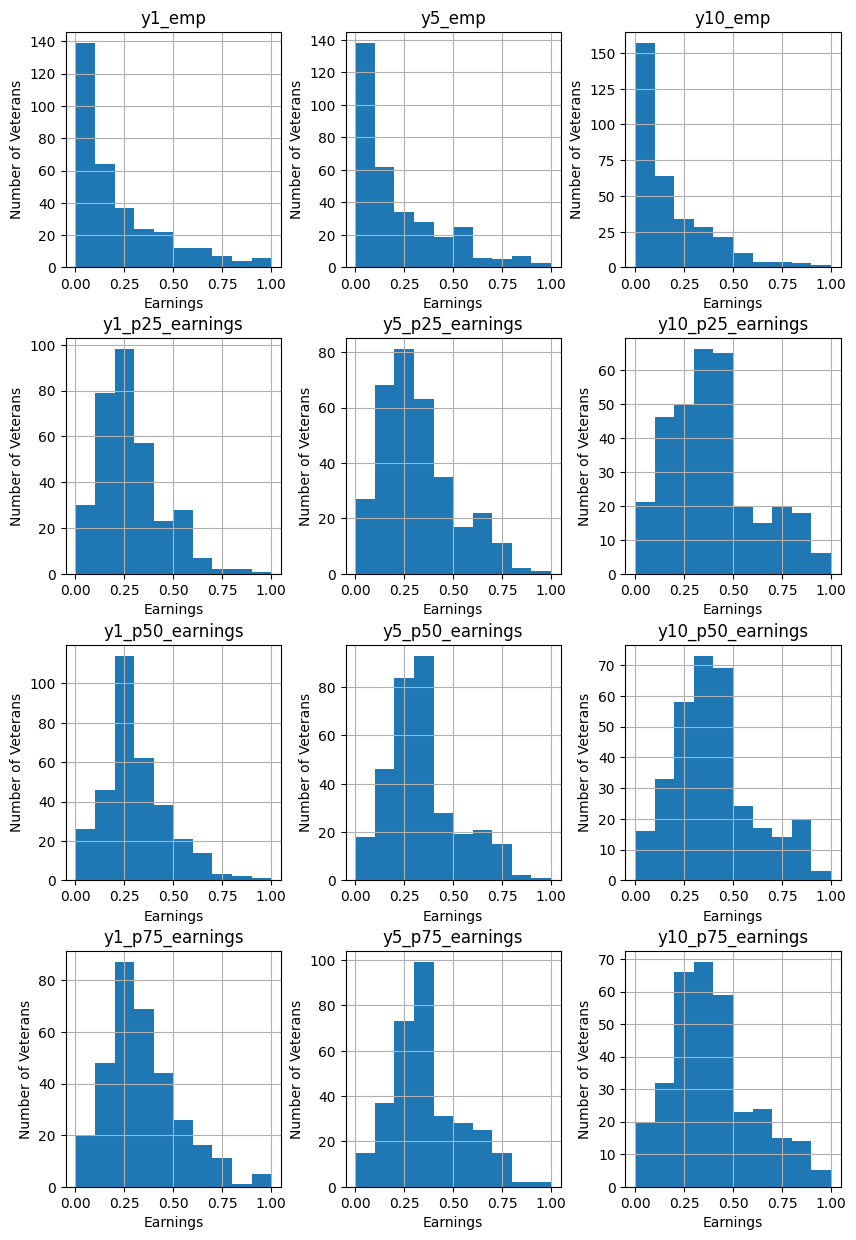

In [17]:
for axes in scaled_data.hist(figsize=(10,15)).flatten():
    axes.set_xlabel("Earnings")  
    axes.set_ylabel("Number of Veterans") 
plt.show()

In [18]:
columns_to_add = data[['label_dod_occ_code', 'label_industry']] #add these columns to the scaled dataset for reference
scaled_data = pd.concat([columns_to_add, scaled_data], axis=1)
scaled_data.to_csv('scaled_data.csv', index=False)